660.0
0.0066


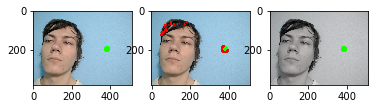

In [3]:
from PIL import Image
from matplotlib import pyplot as plt
import array as arr 
from PIL import ImageFilter

im = Image.open('2.jpg')
rgb_im = im.convert('RGB')
im_test = im.convert('RGB')
hsv_im = im.convert('HSV')
pixel_rgb = rgb_im.load()

largura, altura = im.size 

soma = 0
conta = 0
media = 0
dif_r = 0
dif_g = 0
dif_b = 0

for i in range(largura):
    for j in range(altura):
        h, s, v = hsv_im.getpixel((i, j))
        
        if(h >= 45 and h <= 90 and s >= 50 and v >=20):
            conta = conta + 1
            pixel_rgb[i,j] = (255, 255, 255)
            
        if(pixel_rgb[i,j] != (255, 255, 255)):
            pixel_rgb[i,j] = (0, 0, 0)
            
conta = conta/(largura/altura)
            
print(conta)

k1 = [-1,-1,-1,0,0,0,1,1,1]
imgh = rgb_im.filter(ImageFilter.Kernel((3,3),k1,scale=0.01))

k2 = [-1,0,1,-1,0,1,-1,0,1]
imgv = rgb_im.filter(ImageFilter.Kernel((3,3),k2,scale=0.01))

imgx = Image.blend(imgh,imgv,0.5)

imWE = imgx.filter(ImageFilter.MaxFilter(9))

rgb_im = im.convert('RGB')
pixel_rgb = rgb_im.load()

WE_im = Image.blend(imWE,rgb_im,0.5)
pixel_WE = WE_im.load()

for k in range(largura):
    for l in range(altura):
        r, g, b = rgb_im.getpixel((k, l))
        h, s, v = hsv_im.getpixel((k, l))
        x, y, z = imWE.getpixel((k, l))
        
        media = int(round((r+g+b)/3))
        
        dif_r = (r - media)
        dif_g = (g - media)
        dif_b = (b - media)
        
        if(x == 0 and y == 0 and z == 0):
            pixel_WE[k,l] = (r, g, b)
        else:
            pixel_WE[k,l] = (255, 0, 0)
        
        if(h >= 45 and h <= 138 and s >=70 and v >=30):
            pixel_rgb[k,l] = (r, g, b)
        else:
            if(conta > 0 and conta < 50000):
                pixel_rgb[k,l] = (int(round(media + dif_r * (conta/10000))), 
                                int(round(media + dif_g * (conta/10000))), 
                                int(round(media + dif_b * (conta/10000))))
            else:
                pixel_rgb[k,l] = (int(round(media + dif_r * (conta/100000))), 
                                int(round(media + dif_g * (conta/100000))), 
                                int(round(media + dif_b * (conta/100000))))
            
print(conta/100000)

        
        
f, axarr = plt.subplots(1,3)
axarr[0].imshow(im)
axarr[1].imshow(WE_im)
axarr[2].imshow(rgb_im)